In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import datetime
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data from csv file
users = pd.read_csv('user_info.csv')
products = pd.read_csv('product_info.csv')
interactions = pd.read_csv('interaction_data.csv')

In [12]:
#Delet any null values
users.isnull().values.any()
products.isnull().values.any()
interactions.isnull().values.any()

False

In [4]:
#Transform Expiration Date to datetime format
products['Expiration Date'] = pd.to_datetime(products['Expiration Date'])

#creates label for each of the Interaction Type values
le = LabelEncoder()
interactions['Interaction Type'] = le.fit_transform(interactions['Interaction Type'])

In [5]:
#Merge interactions and products
df = pd.merge(interactions, products, on='Product ID', how='inner')

In [6]:
# Define the date threshold as 60 days from the current date
cutoff_date = pd.Timestamp.now() + pd.Timedelta(days=60)

# Filter out the rows that have "Expiration Date" higher than the threshold
filtered_df = df[ pd.to_datetime(df["Expiration Date"]).dt.date <= cutoff_date.date() ]


In [7]:
# Aggregate by product
agg_interactions = filtered_df.groupby('Product Name').agg(mean_interaction = ('Interaction Type', 'mean'),
                                                number_of_interactions = ('Interaction Type', 'count')).reset_index()

# Keep the products with more tha 50 interactions
agg_interactions_super100 = agg_interactions[agg_interactions['number_of_interactions']>50]
agg_interactions_super100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product Name            89 non-null     object 
 1   mean_interaction        89 non-null     float64
 2   number_of_interactions  89 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


In [8]:
# Check the moust interact products
agg_interactions_super100.sort_values(by='number_of_interactions', ascending=False).head()

,Product Name,mean_interaction,number_of_interactions
78,"Wirebound Message Books, 2 7/8"" x 5"", 3 Forms ...",1.385827,127
53,Martin Yale Chadless Opener Electric Letter Op...,1.462810,121
51,I Need's 3d Hello Kitty Hybrid Silicone Case C...,1.436975,119
21,Cardinal Poly Pocket Divider Pockets for Ring ...,1.529915,117
37,Fellowes High-Stak Drawer Files,1.444444,117


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User ID                8807 non-null   int64         
 1   Product ID             8807 non-null   int64         
 2   Interaction Type       8807 non-null   int64         
 3   Interaction Timestamp  8807 non-null   object        
 4   Product Name           8807 non-null   object        
 5   Category               8807 non-null   object        
 6   Expiration Date        8807 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 550.4+ KB


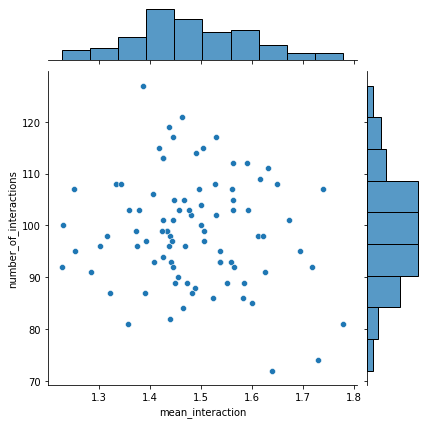

In [10]:
# Visulization
sns.jointplot(x='mean_interaction', y='number_of_interactions', data=agg_interactions_super100)

df_S10 = pd.merge(filtered_df, agg_interactions_super100[['Product Name']], on='Product Name', how='inner')
df_S10.info()

In [11]:
# Save the data in a new csv file
df_S10.to_csv('supermarket_data.csv', index=False)